# Regression Polynomiale

## Importation des dépendances

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importer le dataset

In [7]:
dataset = pd.read_csv('data/Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, -1].values

## Construction du modèle

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
# degre a adapter pour matcher au mieux aux observations
# plus le degre est eleve, plus le risque de sur-apprentissage est eleve
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
polynomialRegressor = LinearRegression()
polynomialRegressor.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Juste pour comparaison avec la régression linéaire

In [9]:
linearRegressor = LinearRegression()
linearRegressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Visualiser les résultats

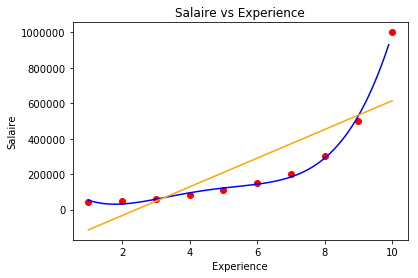

In [10]:
# Visualiser les résultats
X_grid = np.arange(min(X), max(X), 0.1) # juste pour avoir une courbe plus smooth
X_grid = X_grid.reshape((len(X_grid), 1)) # idem
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, polynomialRegressor.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.plot(X, linearRegressor.predict(X), color = 'orange') # pour comparaison
plt.title('Salaire vs Experience')
plt.xlabel('Experience')
plt.ylabel('Salaire')
plt.show()